In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.getcwd()

'/content'

In [3]:
os.listdir('/content/drive/MyDrive/app/Coal Classification')

['Anthracite', 'Bituminous', 'Peat', 'Lignite']

In [4]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Convolution2D , MaxPooling2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator

In [5]:
import cv2,os
data_path='/content/drive/MyDrive/app/Coal Classification'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories, labels))
print(label_dict)
print(categories)
print(labels)


{'Anthracite': 0, 'Bituminous': 1, 'Peat': 2, 'Lignite': 3}
['Anthracite', 'Bituminous', 'Peat', 'Lignite']
[0, 1, 2, 3]


In [6]:
import os
import numpy as np
import shutil

rootdir= '/content/drive/MyDrive/app/Coal Classification' #path of the original folder

classes =  ['Anthracite', 'Bituminous', 'Lignite', 'Peat']

for i in classes:
 os.makedirs(rootdir +'/train/' + i)

 os.makedirs(rootdir +'/test/' + i)

 source = rootdir + '/' + i

 allFileNames = os.listdir(source)

 np.random.shuffle(allFileNames)

 test_ratio = 0.3

 train_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                      [int(len(allFileNames)* (1 - test_ratio))])

 train_FileNames = [source+'/'+ name for name in train_FileNames.tolist()]
 test_FileNames = [source+'/' + name for name in test_FileNames.tolist()]

 for name in train_FileNames:
  shutil.copy(name, rootdir +'/train/' + i)

 for name in test_FileNames:
  shutil.copy(name, rootdir +'/test/' + i)

In [7]:
train_datagen = ImageDataGenerator(rescale=1./ 255,shear_range=0.2,zoom_range=0.2, horizontal_flip=True,validation_split=0.2)

In [8]:
test_datagen = ImageDataGenerator(rescale=1./ 255, )

In [9]:
X_train = train_datagen.flow_from_directory(r"/content/drive/MyDrive/app/Coal Classification/train",target_size=(128, 128),batch_size=4, class_mode='categorical')
  

Found 243 images belonging to 4 classes.


In [10]:
X_test = test_datagen.flow_from_directory(r"/content/drive/MyDrive/app/Coal Classification/test",target_size=(128, 128),batch_size=4, class_mode='categorical')
  

Found 108 images belonging to 4 classes.


In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam

In [12]:
model=Sequential()

In [13]:
model.add(Convolution2D(32,(3,3),input_shape=(128, 128, 3),activation="relu"))


In [14]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [15]:
model.add(Convolution2D(32,(3,3),activation="relu"))

In [16]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [17]:
model.add(Flatten())

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
Total params: 10,144
Trainable params: 10,144
Non-traina

In [19]:
model.add(Dense(300,activation="relu"))


In [20]:
model.add(Dense(150,activation="relu"))


In [21]:
model.add(Dense(4,activation="softmax"))


In [22]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

In [23]:
history=model.fit_generator(X_train,validation_data=X_test,epochs=30)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


61/61 [==============================] - 13s 81ms/step - loss: 1.4346 - accuracy: 0.2716 - val_loss: 1.3829 - val_accuracy: 0.2963
Epoch 2/30
61/61 [==============================] - 5s 78ms/step - loss: 1.3779 - accuracy: 0.3004 - val_loss: 1.3746 - val_accuracy: 0.2963
Epoch 3/30
61/61 [==============================] - 5s 76ms/step - loss: 1.3748 - accuracy: 0.3210 - val_loss: 1.3684 - val_accuracy: 0.2963
Epoch 4/30
61/61 [==============================] - 5s 77ms/step - loss: 1.3055 - accuracy: 0.3745 - val_loss: 1.4620 - val_accuracy: 0.3241
Epoch 5/30
61/61 [==============================] - 5s 77ms/step - loss: 1.2946 - accuracy: 0.3704 - val_loss: 1.4041 - val_accuracy: 0.3519
Epoch 6/30
61/61 [==============================] - 5s 78ms/step - loss: 1.2441 - accuracy: 0.3909 - val_loss: 1.4813 - val_accuracy: 0.2963
Epoch 7/30
61/61 [==============================] - 5s 81ms/step - loss: 1.2327 - accuracy: 0.4486 - val_loss: 1.4639 - val_accuracy: 0.3241
Epoch 8/30
61/61 [=====

In [24]:
model.save('/content/drive/MyDrive/app/coal1.h5')

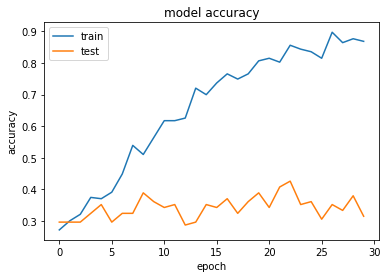

<Figure size 432x288 with 0 Axes>

In [25]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()
plt.savefig("CNN_MODEL")

In [26]:
from tensorflow.keras.models import load_model
model.load_weights('/content/drive/MyDrive/app/coal1.h5')

In [28]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
model.load_weights('/content/drive/MyDrive/app/coal1.h5')
img=image.load_img(r"/content/drive/MyDrive/app/Coal Classification/test/Anthracite/16.jpg",target_size=(128,128))
x=image.img_to_array(img)
x.shape

(128, 128, 3)

In [29]:
import numpy as np
x=np.expand_dims(x,axis=0)
x.shape

(1, 128, 128, 3)

In [30]:
prediction=model.predict(x)
prediction

1/1 [==============================] - 0s 135ms/step


array([[1., 0., 0., 0.]], dtype=float32)

In [32]:
index=["Anthracite","Bituminous","Lignite","Peat"]

In [33]:
result=str(index[prediction[0].tolist().index(1)])
result

'Anthracite'